In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


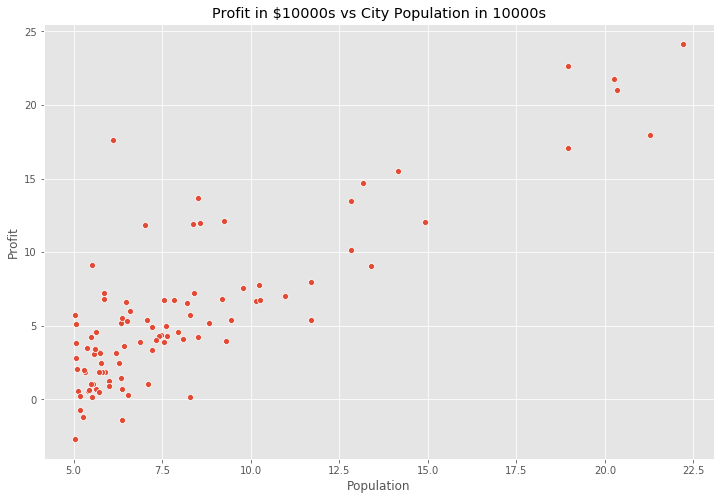

In [6]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    hypo = X.dot(theta)
    error = (hypo - y) ** 2
    cost_func = (1 / (2 * m)) * np.sum(error)
    return cost_func

In [10]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        hypo = X.dot(theta)
        error = np.dot(X.transpose(), (hypo - y))
        theta -= alpha *  1/m * error
        costs.append(cost_function(X, y, theta))

    return theta, costs

In [12]:
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

h(x) = -3.79 + 1.18x1


In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

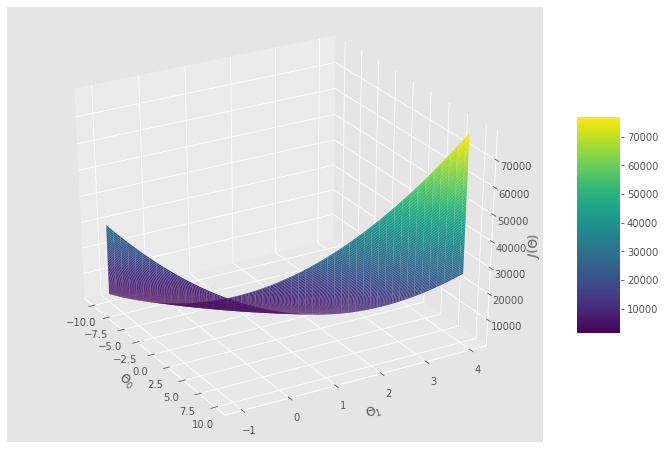

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

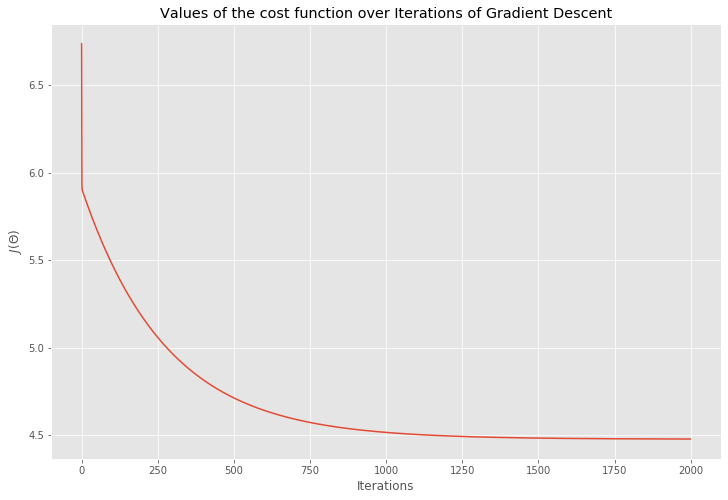

In [16]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the cost function over Iterations of Gradient Descent');

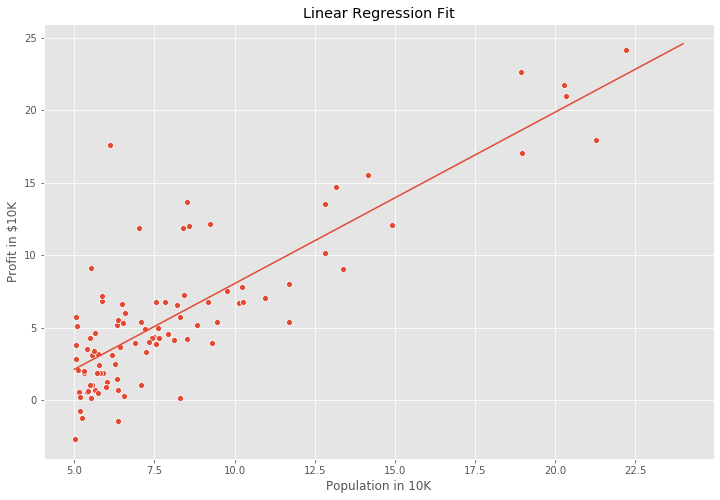

In [17]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = data)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10K')
plt.ylabel('Profit in $10K')
plt.title('Linear Regression Fit');

In [18]:
def predict(x, theta):
    hypo = np.dot(theta.transpose(), x)
    return hypo

In [19]:
prediction_1 = predict(np.array([1,4]), theta) * 10000
print('For a population of  40,000 people, the model predicts a profit of $' + str(round(prediction_1, 0)))

For a population of  40,000 people, the model predicts a profit of $9408.0


In [20]:
prediction_1 = predict(np.array([1,8.3]), theta) * 10000
print('For a population of  83,000 people, the model predicts a profit of $' + str(round(prediction_1, 0)))

For a population of  83,000 people, the model predicts a profit of $60243.0
